# Learning Points & Summary
Today was a pretty packed lesson where we introduced a lot of new concepts. In this lesson we looked at how to:

* Use nested loops to remove unwanted characters from multiple columns

* Filter Pandas DataFrames based on multiple conditions using both `.loc[]` and `.query()`

* Create bubble charts using the Seaborn Library

* Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters

* Use floor division `//` (i.e., integer division) to convert years to decades

* Use Seaborn to superimpose a linear regressions over our data

* Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric

* Run regressions with scikit-learn and calculate the coefficients.

Well done on completing the next step in your data science journey 👏👏👏 Upwards and onwards!

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-16_17-01-51-5186292464bbe111735684db09cda03a.gif'>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [114]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [115]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [116]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [117]:
data.shape

(5391, 6)

In [118]:
data.isna().count()

Rank                     5391
Release_Date             5391
Movie_Title              5391
USD_Production_Budget    5391
USD_Worldwide_Gross      5391
USD_Domestic_Gross       5391
dtype: int64

In [119]:
# Check if there are any NaN values left
data.isna().values.any()

False

In [120]:
# Check if there are any duplicate rows
data.duplicated().values.any()

False

In [121]:
# Count total number of duplicates
duplicated_rows = data[data.duplicated()] # Create subset
len(duplicated_rows) # Length of subset

0

In [122]:
# Check duplicate by creating subset
data[data.duplicated(subset=["Movie_Title", "Release_Date"])]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [123]:
data[data["Movie_Title"]=="A Dog's Breakfast"]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3054,5289,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [124]:
# Clean the duplicate
data = data.drop_duplicates(subset=["Movie_Title", "Release_Date"])
data[data["Movie_Title"]=="A Dog's Breakfast"]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3054,5289,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [125]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [126]:
# Fast way to check data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5390 non-null   int64 
 1   Release_Date           5390 non-null   object
 2   Movie_Title            5390 non-null   object
 3   USD_Production_Budget  5390 non-null   object
 4   USD_Worldwide_Gross    5390 non-null   object
 5   USD_Domestic_Gross     5390 non-null   object
dtypes: int64(1), object(5)
memory usage: 294.8+ KB


In [127]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [128]:
# Manually convert each column:
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace(',','')
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$','')

data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)

In [129]:
# Use for loop to convert multiple columns
chars_to_remove = [',','$']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for column in columns_to_clean:
  for char in chars_to_remove:
    # Replace each character with an empty string
    data[column] = data[column].astype(str).str.replace(char,'')
  # Convert column to a numeric data type
  data[column] = pd.to_numeric(data[column])

In [130]:
# Use regex for shorter code:
# usd_cols = ['USD_Production_Budget', 'USD_Worldwide_Gross','USD_Domestic_Gross']
# for col in usd_cols:
#   data[col] = data[col].str.replace(r'[$,.]','',regex=True)
#   data[col] = pd.to_numeric(data[col])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [131]:
# Convert column to a datetime data type
data.Release_Date = pd.to_datetime(data.Release_Date)

# Quick check for data types of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5390 non-null   int64         
 1   Release_Date           5390 non-null   datetime64[ns]
 2   Movie_Title            5390 non-null   object        
 3   USD_Production_Budget  5390 non-null   int64         
 4   USD_Worldwide_Gross    5390 non-null   int64         
 5   USD_Domestic_Gross     5390 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 294.8+ KB


In [132]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [133]:
data.describe()
# What is the average production budget of the films in the data set?
# # $31,119,487.81
# What is the average worldwide gross revenue of films?
# # $88,871,907.20
# What were the minimums for worldwide and domestic revenue?
# # $0.00
# Are the bottom 25% of films actually profitable or do they lose money?
# # Most lose money
# What are the highest production budget and highest worldwide gross revenue of any film?
# # Production Budget: 425,000,000.00
# # Worldwide Gross Budget: 2,783,918,982.00

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,390.00","5,390.00","5,390.00","5,390.00"
mean,"2,695.52","31,119,487.81","88,871,907.20","41,243,169.82"
std,"1,556.14","40,525,356.93","168,469,037.10","66,033,082.74"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.25","5,000,000.00","3,877,146.00","1,335,065.75"
50%,"2,695.50","17,000,000.00","27,460,037.00","17,196,565.00"
75%,"4,042.75","40,000,000.00","96,461,821.00","52,348,661.50"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [134]:
data.loc[data.USD_Production_Budget.idxmax()].USD_Worldwide_Gross
# $2,783,918,982

2783918982

In [135]:
data.loc[data.USD_Production_Budget.idxmin()].USD_Worldwide_Gross
# $181,041

181041

In [136]:
# The lowest budget film:
data[data.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [137]:
# The highest budget film:
data[data.USD_Production_Budget == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [138]:
# Number of films grossed $0 domestically
len(data[data.USD_Domestic_Gross == 0])

zero_domestic = data[data.USD_Domestic_Gross == 0]
print('Number of films grossed $0 domestically: ', len(zero_domestic))
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films grossed $0 domestically:  511


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [139]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print('Number of films grossed $0 worldwide: ', len(zero_worldwide))
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films grossed $0 worldwide:  356


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [140]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]

international_releases.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
...,...,...,...,...,...,...
4862,5206,2015-03-24,Along the Roadside,250000,3234,0
5113,5267,2015-12-31,Lumea e a mea,168000,29827,0
4535,5276,2013-12-31,Speak No Evil,150000,32927,0
4072,5319,2011-12-31,Absentia,70000,8555,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [141]:
int_releases = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')
print('Number of films:', len(int_releases))
int_releases.sort_values('USD_Production_Budget', ascending=False)

Number of films: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
...,...,...,...,...,...,...
4862,5206,2015-03-24,Along the Roadside,250000,3234,0
5113,5267,2015-12-31,Lumea e a mea,168000,29827,0
4535,5276,2013-12-31,Speak No Evil,150000,32927,0
4072,5319,2011-12-31,Absentia,70000,8555,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [142]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [143]:
# Identify which films were not released yet as of the time of data collection
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of unreleased films: {len(future_releases)}')
future_releases

Number of unreleased films: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [144]:
# Create another DataFrame called data_clean that does not include these films.
data_clean = data.drop(future_releases.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [145]:
money_losing = data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing)/len(data_clean)

# # Use .loc[] property:
# money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
# len(money_losing)/len(data_clean)

# # Use .query() function:
# money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
# money_losing.shape[0]/data_clean.shape[0]

0.3726546535389188

# Seaborn for Data Viz: Bubble Charts

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-15_09-09-20-72497b72e13443b2cebd18af668ac37e.png'>

In [146]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



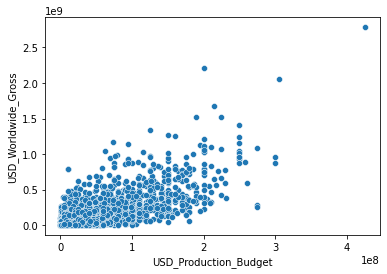

In [147]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')

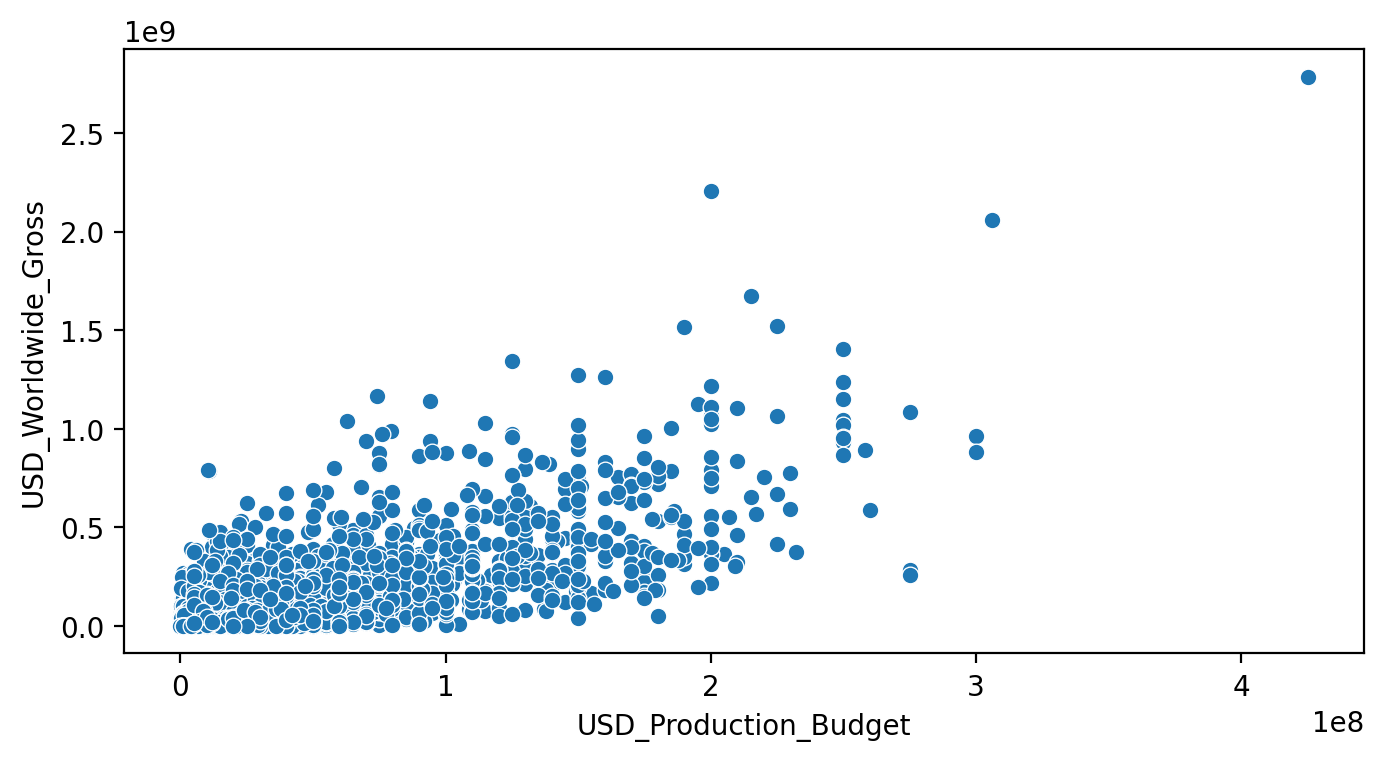

In [148]:
# Increase size of the figure
plt.figure(figsize=(8,4), dpi=200)

# Create scatterplot by supplying the DataFrame and the column names that would be on axes
sns.scatterplot(data=data_clean, # DataFrame
                x='USD_Production_Budget', # Column names
                y='USD_Worldwide_Gross')

plt.show()

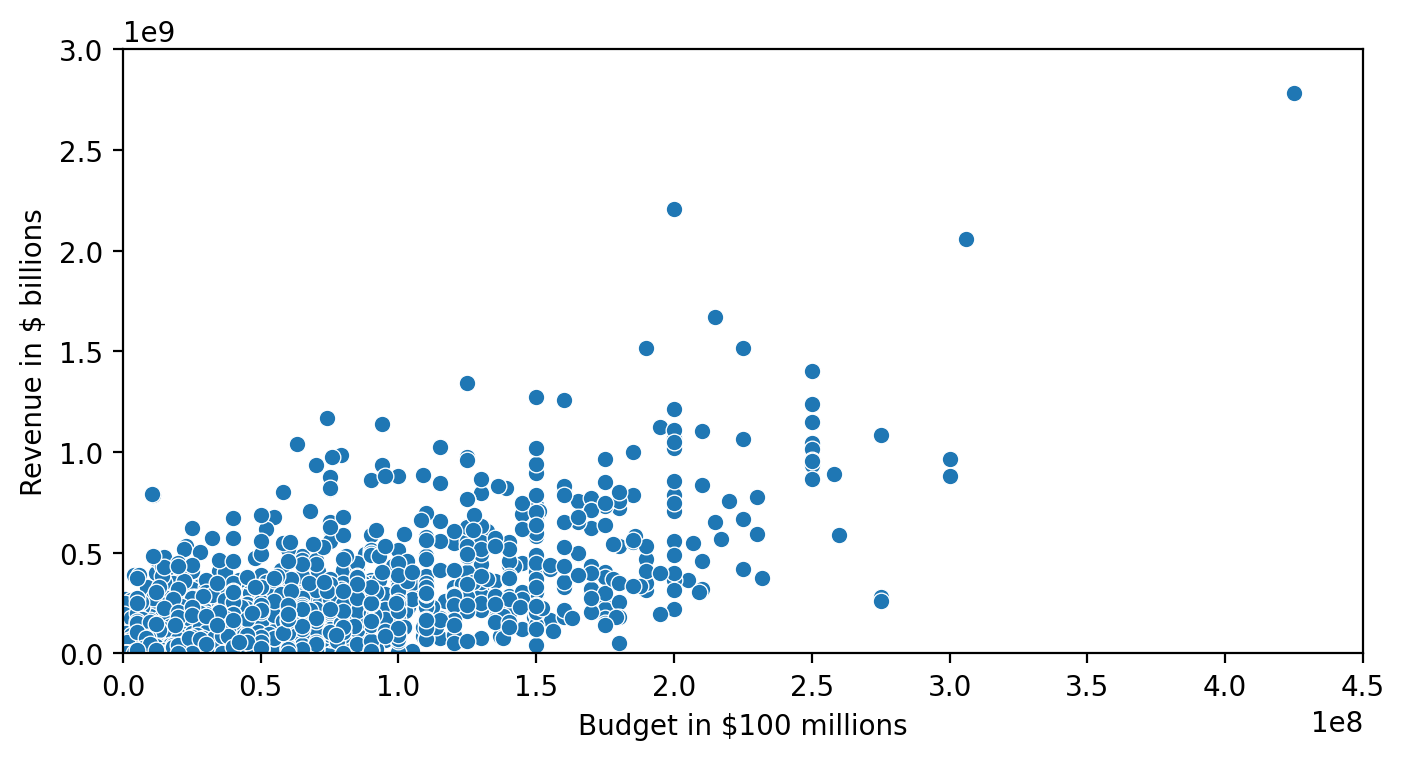

In [149]:
# Increase size of the figure
plt.figure(figsize=(8,4), dpi=200)

# Create scatterplot by supplying the DataFrame and the column names that would be on axes
ax = sns.scatterplot(data=data_clean, # DataFrame
                x='USD_Production_Budget', # Column names
                y='USD_Worldwide_Gross')

# Style the chart by configuring the Axes object that is returned from sns.scatterplot()
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

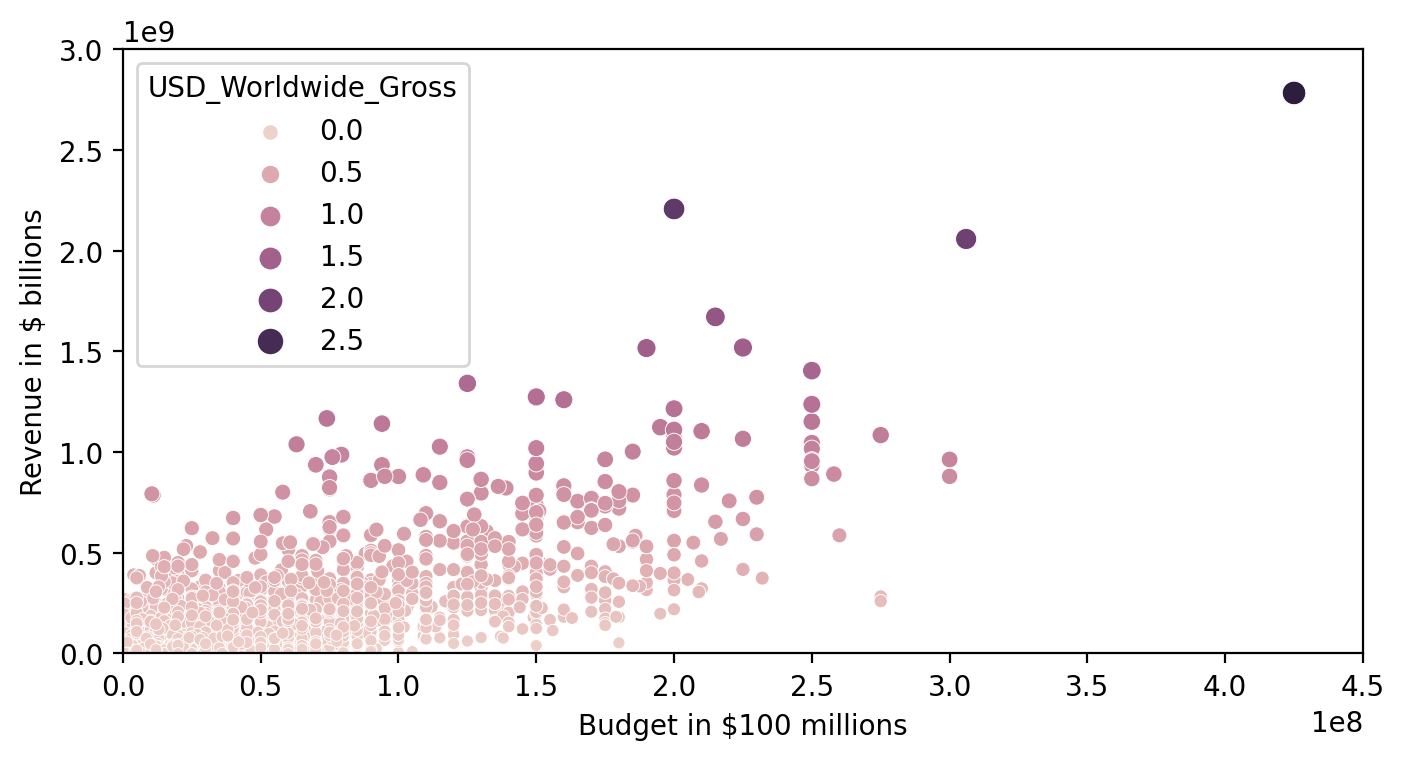

In [150]:
# Increase size of the figure
plt.figure(figsize=(8,4), dpi=200)

# Create scatterplot by supplying the DataFrame and the column names that would be on axes
ax = sns.scatterplot(data=data_clean, # DataFrame
                x='USD_Production_Budget', # Column names
                y='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross', # color
                size='USD_Worldwide_Gross') # dot/bubble size

# Style the chart by configuring the Axes object that is returned from sns.scatterplot()
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

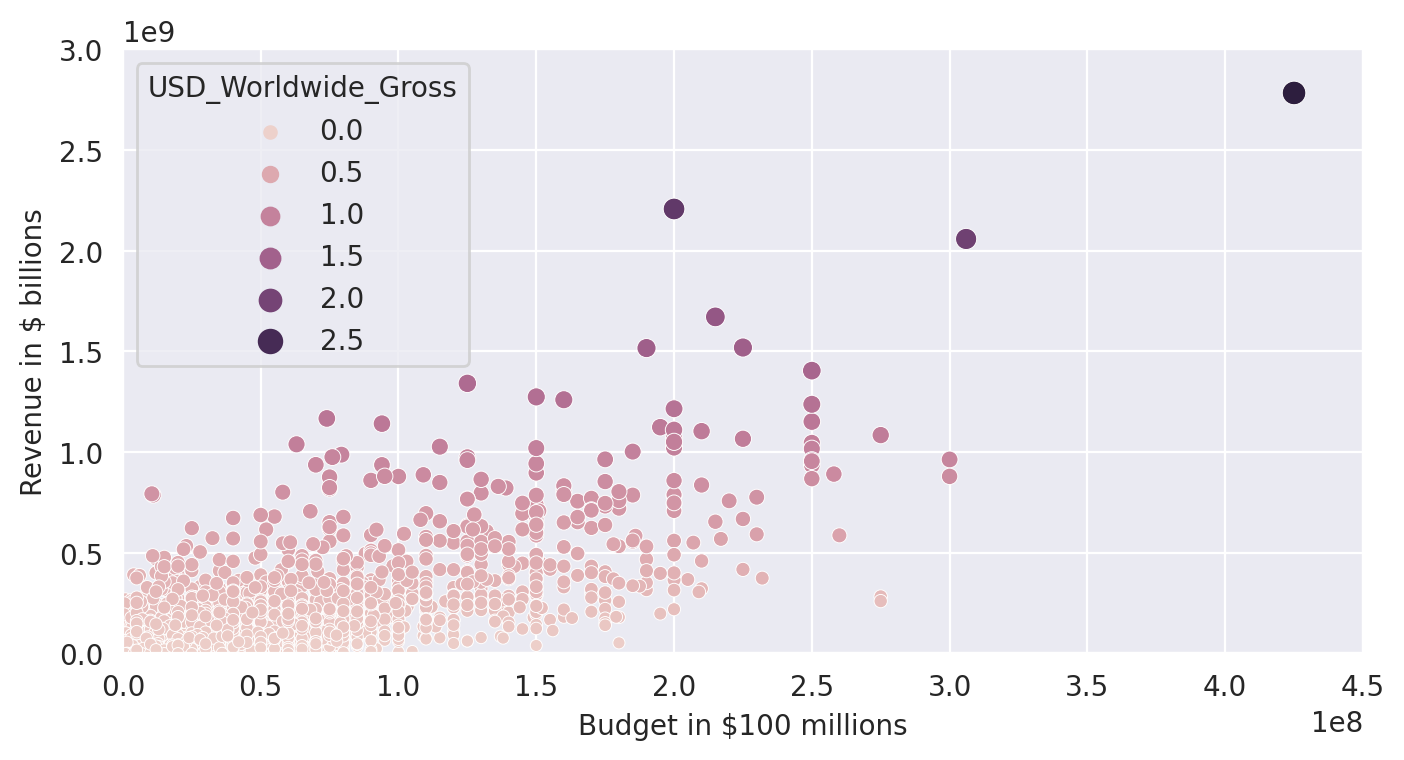

In [151]:
# Increase size of the figure
plt.figure(figsize=(8,4), dpi=200)

# Set styling on a single chart
with sns.axes_style('darkgrid'):
  # Create scatterplot by supplying the DataFrame and the column names that would be on axes
  ax = sns.scatterplot(data=data_clean, # DataFrame
                  x='USD_Production_Budget', # Column names
                  y='USD_Worldwide_Gross',
                  hue='USD_Worldwide_Gross', # color
                  size='USD_Worldwide_Gross') # dot/bubble size

  # Style the chart by configuring the Axes object that is returned from sns.scatterplot()
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

plt.show()

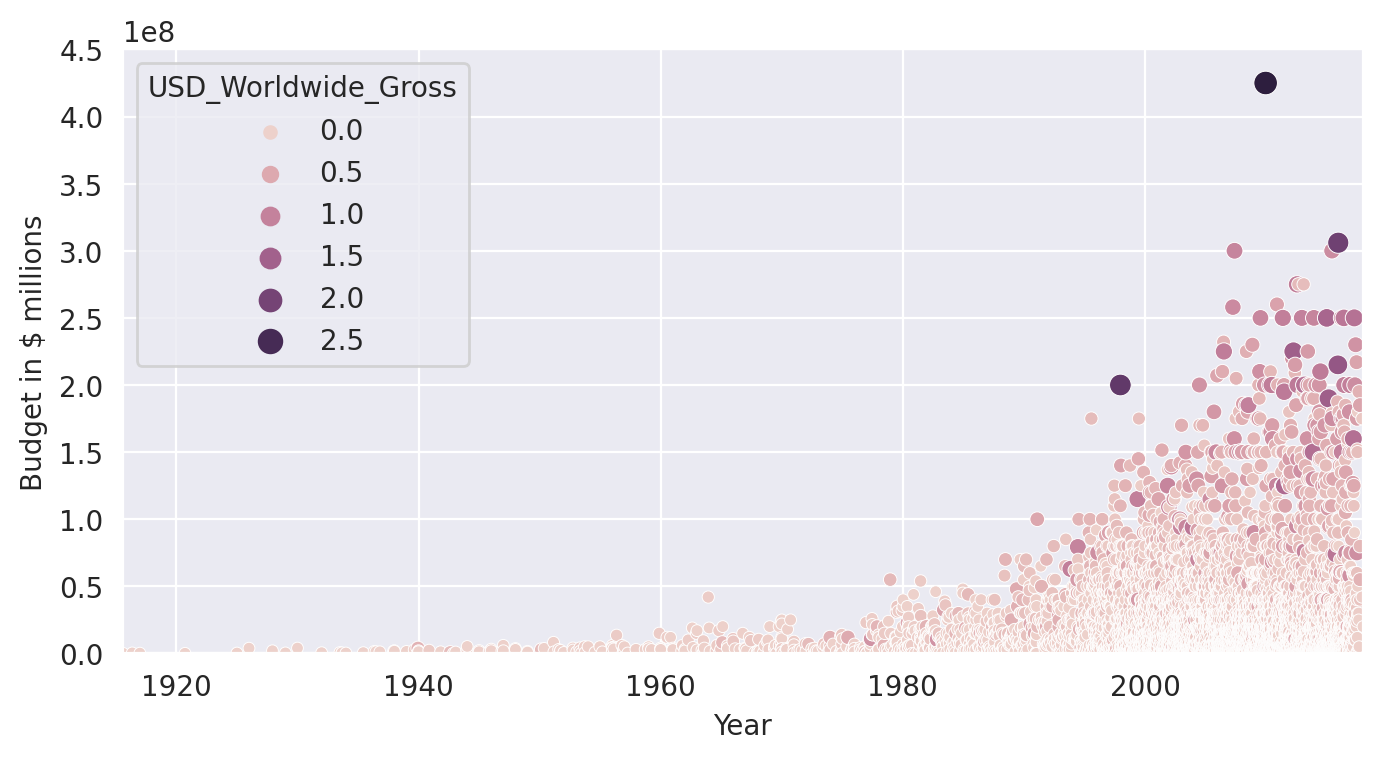

In [152]:
# Increase size of the figure
plt.figure(figsize=(8,4), dpi=200)

# Set styling on a single chart
with sns.axes_style('darkgrid'):
  # Create scatterplot by supplying the DataFrame and the column names that would be on axes
  ax = sns.scatterplot(data=data_clean, # DataFrame
                  x='Release_Date', # Column names
                  y='USD_Production_Budget',
                  hue='USD_Worldwide_Gross', # color
                  size='USD_Worldwide_Gross') # dot/bubble size

  # Style the chart by configuring the Axes object that is returned from sns.scatterplot()
  ax.set(ylim=(0, 450000000),
         xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
         ylabel='Budget in $ millions',
         xlabel='Year')

plt.show()

**Analysis**

What do we see here? What is this chart telling us? Well, first off, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-15_10-00-28-26cc75fe26fee70f2445c638aa490791.png'>

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [153]:
# Create a DatetimeIndex object from the Release_Date column.
dt_index = pd.DatetimeIndex(data_clean.Release_Date)

# Grab all the years from the DatetimeIndex object using the .year property.
years = dt_index.year
years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5383)

In [154]:
# Use floor division // to convert the year data to the decades of the films.
decades = years//10*10
decades

Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5383)

In [155]:
# Add the decades as a Decade column to the data_clean DataFrame.
data_clean['Decade'] = decades
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [156]:
old_films = data_clean[data_clean.Decade < 1970]
print(f'Old films: {len(old_films)}')
print(f'Most expensive old film: {old_films.loc[old_films.USD_Production_Budget.idxmax()]}')

new_films = data_clean[data_clean.Decade >= 1970]
print(f'New films: {len(new_films)}')


Old films: 153
Most expensive old film: Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Decade                                  1960
Name: 109, dtype: object
New films: 5230


# Seaborn Regression Plots

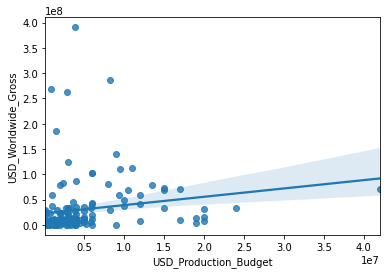

In [157]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

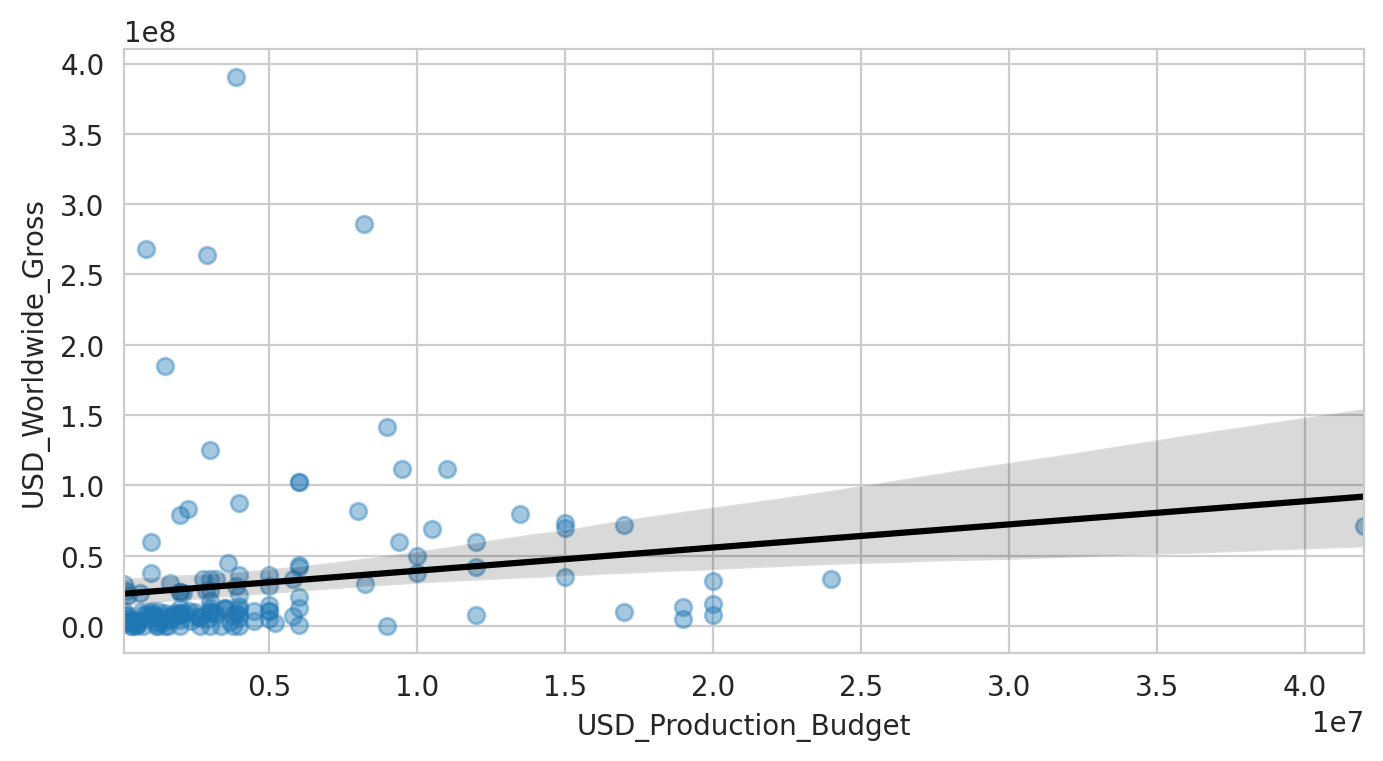

In [158]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

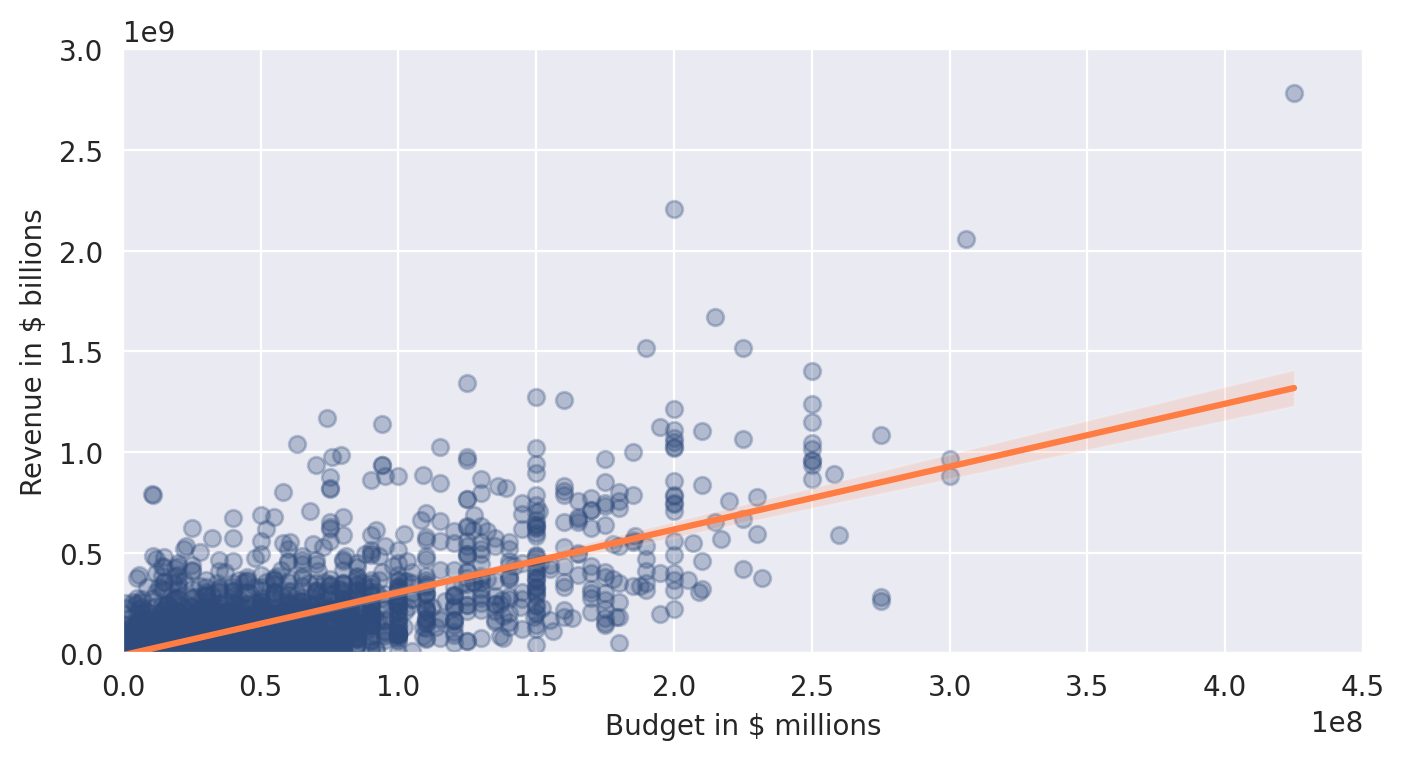

In [159]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(
      ylim=(0, 3000000000),
      xlim=(0, 450000000),
      xlabel='Budget in $ millions',
      ylabel='Revenue in $ billions'
  )

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [160]:
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [161]:
# Create a LinearRegression object
regression = LinearRegression()

In [162]:
# Specify the features (Uppercase) and the targets (lowercase) (i.e., response variable)

# Explanatory Variables(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
# Theta zero
regression.intercept_

# How do we interpret the y-intercept? 
# If a movie budget is $0, the estimated movie revenue is -$8.65 million.

array([-8653311.20858923])

In [164]:
# Theta one
regression.coef_

# For every extra $1 in the budget, movie revenue increases by $3.1. 

array([[3.12262611]])

In [165]:
# R-squared
regression.score(X, y)

# This means that the model explains about 56% of the variance in movie revenue.

0.5576797626619335

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-16_16-23-44-7a1c656b072897f661cc8efdfca94144.png'>

In [166]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X,  y)
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(X, y)}')

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080386
The r-squared is: 0.02937258620576877


Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since the slope (our theta-one) is 1.6, but the r-squared is very low.

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-16_16-43-08-86be88ceaa656f3a0c07f04d3cf0dac7.png'>

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [171]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
regression.fit(X,  y)
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(X, y)}')

The slope coefficient is: [3.12262611]
The intercept is: -8653311.208589226
The r-squared is: 0.5576797626619335


In [174]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 million film is around ${revenue_estimate/1000000:.0f}M')

The estimated revenue for a $350 million film is around $1084M


**Help for others**
Patrick · Lecture 653 · 6 months ago

Actually, we do not have to create a complete Dataframe for every variable. That would be gruesome.

I'll explain it in a less professional way:

sklearn awaits something with rows and columns.

If we have only one explanatory variable in our model, that would result in 1 column and n rows for sklearn as input.

Thus, we need 2 dimensions. As we have previously learned on the numpy course we await something like that (dim, dim).

Furthermore, a object.shape cmd should return something like (rows, column) for one explanatory variable like USD_Production_Budget

However, if we try data.USD_Production_Budget.shape, we only see the rows, e.g. (5231, ). Thus we have only 1 dimension. That is something sklearn cannot cope with.

To circumvent that fact, we do not need to create a new variable from scratch in a dataframe. And without knowing what is ahead in the other courses (maybe she will explain it later) I'll tell you, all we need is a second dimension: The column. Although we could reshape or redim our variable its much more easy.

So instead of writing X = pd.Dataframe ... to create a rows, column input you can simply double bracket your original data
```
X = new_films[["USD_Production_Budget"]]
```
and voila (without the thingy over the i) you get X.shape (5231, 1)


If you had more than one exogenous variable:
```
[["USD_Production_Budget", "USD_Domestic_Gross"]]
```

What we are doing here is adding another dimension, to the other variable/s, with that approach, or just reshaping it.



That is enough for the input (without diving deeper into train, test random state or whatever)

```
regression = LinearRegression()

X = new_films[["USD_Production_Budget"]]

y = new_films[["USD_Worldwide_Gross"]]

model = regression.fit(X,y)

print(model.predict([[350000000]]))

print(regression.coef_)

print(regression.intercept_)
```
```
[[3.12259592]]
[-8650768.00661024]
```
All the best,
Patrick

P.S. that is the 'model' for the new_films dataset